In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url, header = None)

In [10]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


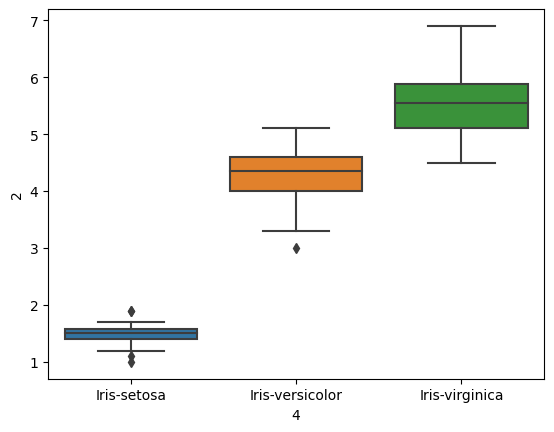

In [11]:
sns.boxplot(x = 4,y= 2,data=iris)
plt.show()

<AxesSubplot:xlabel='2', ylabel='3'>

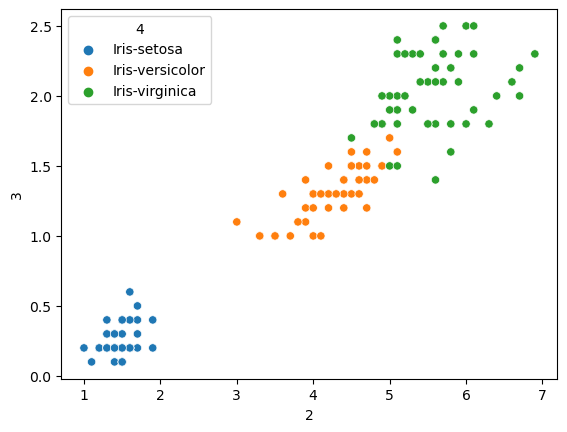

In [14]:
sns.scatterplot(x=2, y=3, hue=4, data=iris)

<AxesSubplot:xlabel='0', ylabel='1'>

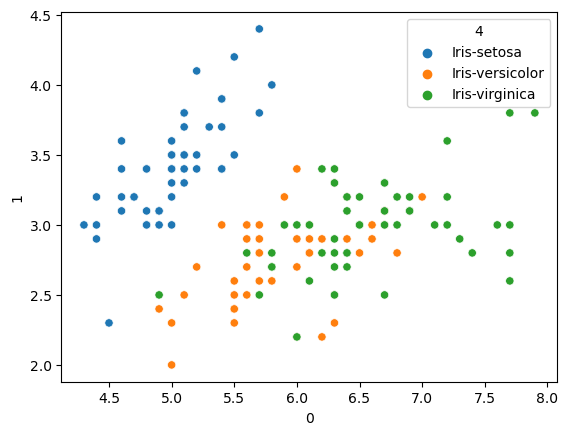

In [15]:
sns.scatterplot(x=0, y=1, hue=4, data=iris)

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_encoded=le.fit_transform(iris[4])

In [18]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(iris[[0,1,2,3]],y_encoded,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

c:\Users\lalmutairi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred=clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test, y_pred, labels=[0,1,2])
cnf_matrix

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [29]:
y_pred_orig= le.inverse_transform(y_pred)

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion Matrix',cmap=plt.cm.Greens):
    print('Confusion Matrix')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix


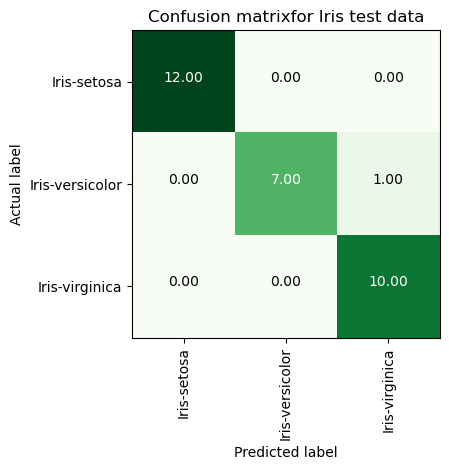

In [31]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,title='Confusion matrixfor Iris test data')